In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# read_players_file <- read_csv("/home/jovyan/work/DSCI100_Individual_Project/data/players.csv")
# read_players_file <- read_players_file |>
#   mutate(
#     experience = factor(
#       experience,
#       levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"),
#       ordered = TRUE
#     ), gender = factor(gender,levels = c("Male","Female","Non-binary","Prefer not to say","Agender","Two-Spirited","Other"),ordered = TRUE)
#   )
# read_players_file|>
#   summarize(
#     mean_age = mean(Age, na.rm = TRUE),
#     min_age = min(Age, na.rm = TRUE),
#     max_age = max(Age, na.rm = TRUE),
#     mean_hours = mean(played_hours, na.rm = TRUE),
#     min_hours = min(played_hours, na.rm = TRUE),
#     max_hours = max(played_hours, na.rm = TRUE),
#   )
# read_players_file |>
#   count(experience, sort = TRUE) |>
#   slice(1)
# read_players_file |>
#   count(subscribe, sort = TRUE) |>
#   slice(1)
# read_players_file |>
#   count(gender, sort = TRUE)

***Data Description and Statistics of Players.csv file***

The number of observations in the players file is ***196 players*** and ***7 columns (headings)***. The names and descriptions of variables are as follows: 
1. Experience: This variable records the level of experience that each player reports with the game. It is a categorical variable with five categories: Beginner, Amateur, Regular, Veteran, and Pro. The most common group is Amateur, with 63 players.

2. Subscribe: Indicates whether the player has subscribed to the research newsletter. It is a categorical variable with values TRUE or FALSE. Out of 196 players, 144 have subscribed.

3. HashedEmail: A character variable representing each player’s unique ID.

4. Played_hours: Shows the total number of hours a player has spent on the server. It is a numeric variable. The average number of hours played is 5.85, with a minimum of 0 and a maximum of 223.10 hours.

5. Name: A character variable storing the in-game display name chosen by each player. Every name is unique. 

6. Gender: A categorical variable describing the player’s gender. There are 7 categories (male, female, agender, other, two-spirited, prefer not to say, and non-binary), with male being the most frequent (124 players).

7. Age: A numeric variable representing the player’s age in years. The average age is 21.14, with a minimum age of 9 and a maximum age of 58 years old.


The ***Data*** statstics collected using the formula of R and it is shown above.

The data came from the research group in computer science at UBC, which is led by Frank Wood. They collected the data by setting up the Minecraft server, and the actions are recorded as they go through the world. Two datasets are provided, which will capture players' demographics and engagement in the game namely ***"players.csv"***.

Yes, there are some issues with the dataset, such as the Gender, Subscribe, and Experience columns, which should be categorical variables, not character variables. This can cause incorrect statistics, specifically when we want to use max and min functions using R. Moreover, there are two missing values in the age column.

Also, there are some other potentials that can't be seen as of now, such as it being a voluntary dataset, not a random dataset, and from the class of statistics, we have learned that we can't generalize these results to the larger audience and make inferences out of it. There are some players who have joined the Minecraft server but never played on the server, and these can impact the results of the statistics.

In [3]:
# read_session_file <- read_csv("/home/jovyan/work/DSCI100_Individual_Project/data/sessions.csv")
# read_session_file
# n_unique_players <- n_distinct(read_session_file[["hashedEmail"]])
# n_unique_players


***Data Description and Statistics of Sessions.csv file***

The number of observations in the sessions file is 1535 sessions and 5 columns (headings). The names and descriptions of variables are as follows:

HashedEmail: A character variable that represents the unique ID of each player. There are 125 unique player IDs recorded in this file, which means that not all 196 players in the players dataset have session data, and some players appear multiple times.

Start_time: A character variable showing the human-readable timestamp of when a player’s session began. 

End_time: A character variable showing when the session ended.

Original_start_time: A numeric variable that records the start timestamp.

Original_end_time: A numeric variable recording the session’s end timestamp.


The data came from the research group in computer science at UBC, which is led by Frank Wood. They collected the data by setting up the Minecraft server, and the actions are recorded as they go through the world. Two datasets are provided, which will capture players' demographics and engagement in the game namely ***"sessions.csv"***.

Yes, there are some issues with the dataset, such as the Start_time and End_time, which should be stored separately as date and time objects, not character variables. This can cause incorrect statistics for accurate date-time analysis. There are some end-times entries missing, which can cause results to be manipulated even with one missing piece of data.

Also, there are some other potentials that can't be seen as of now, such as it being a voluntary dataset, not a random dataset, and from the class of statistics, we have learned that we can't generalize these results to the larger audience and make inferences out of it. There are some players who have joined the Minecraft server but never played on the server; maybe they just want to test something. There might be time zone differences, which can impact the results of the statistics.

***Now this is answering Q2:***

***Broad Question:***
What behaviors of Minecraft players are associated with the outcome that they will subscribe to the game-related newsletter?

***Specific Question:***
Can we predict whether the player will subscribe to the game-related newsletter based on their experience level, total time played, and age?

***Explanation and Data use:***
As we can see, the response variable in the question is "subscribe," which is a categorical variable (True, False). The data in the "players.csv" file will help us to answer all the questions, as it includes all relevant variables such as experience, played_hours, and age, and for the wrangling part, we will convert the experience column into the categorical variable and also check about the missing age and played_hours values.

***This is answering question 3:***

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


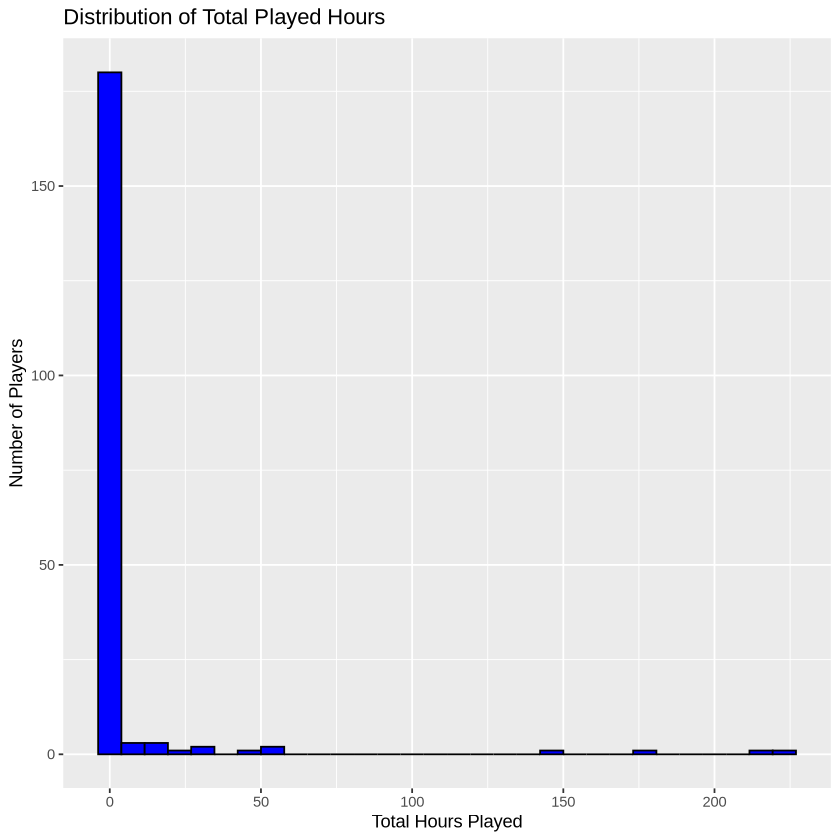

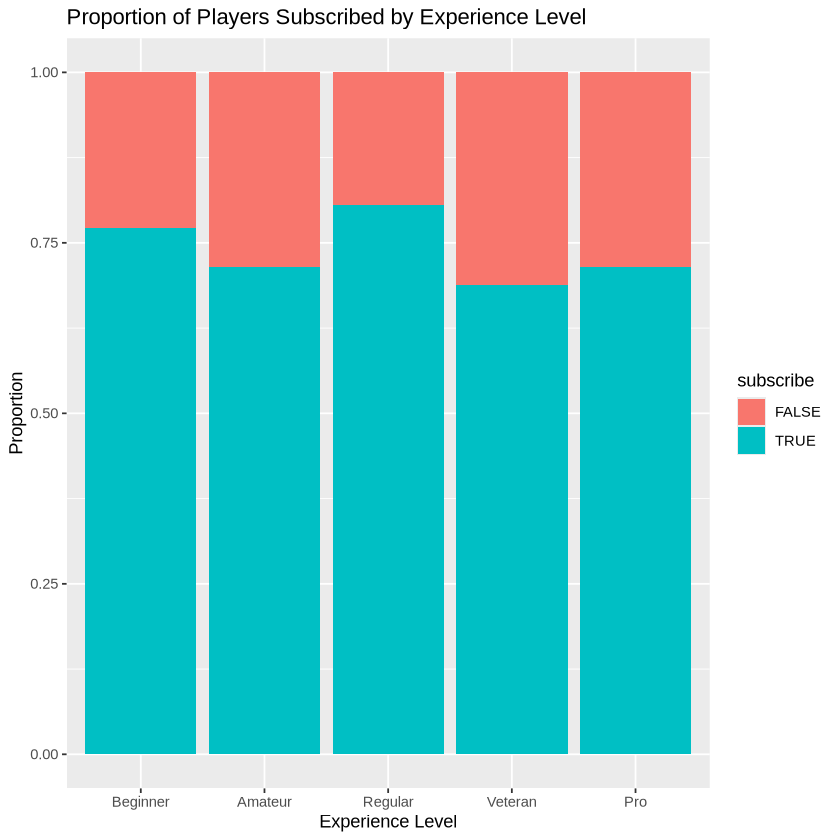

In [5]:
read_players_file <- read_csv("/home/jovyan/work/DSCI100_Individual_Project/data/players.csv")
read_players_file |>
  summarize(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2)
  )

#wrangling
read_players_file <- read_players_file |>
  mutate(
    experience = factor(
      experience,
      levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"),
      ordered = TRUE
    ),
    subscribe = as.factor(subscribe)
  )

# Distribution of total hours played
read_players_file |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(
    title = "Distribution of Total Played Hours",
    x = "Total Hours Played",
    y = "Number of Players"
  )

# Subscription status by experience level
read_players_file |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Proportion of Players Subscribed by Experience Level",
    x = "Experience Level",
    y = "Proportion"
  )


I have successfully loaded data of ***players.csv*** and performed minimum data wrangling by converting **experience** into an ordered factor and **subscribe** into the categorical variable. The mean values of the variables played_hours and age are shown above in the table format as 5.85 and 21.14, respectively.

The histogram above shows strong right-skewed data where most of the players logged for only a few hours, and only a small number have accumulated long hours of playtime. This suggests that there will be lot of challenges for modeling due to skewness of the data.

The bar chart indicates that regular players have the highest proportion of subscriptions, while veteran players show a noticeably lower subscription rate. The remaining three groups—Beginner, Amateur, and Pro—all exhibit relatively similar subscription proportions.